<a href="https://colab.research.google.com/github/mostafa-ja/mal_adv3/blob/main/1_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/file/d/1wU686D7BJyHbg3sa8y_08d0lEzA6qE8E/view?usp=sharing
import gdown
download_link = 'https://drive.google.com/uc?id=1wU686D7BJyHbg3sa8y_08d0lEzA6qE8E'
output_filepath = '/content/'
gdown.download(download_link, output_filepath)

Downloading...
From: https://drive.google.com/uc?id=1wU686D7BJyHbg3sa8y_08d0lEzA6qE8E
To: /content/drebin_drift.parquet.zip
100%|██████████| 16.6M/16.6M [00:00<00:00, 35.9MB/s]


'/content/drebin_drift.parquet.zip'

In [2]:
import pandas as pd
df = pd.read_parquet("/content/drebin_drift.parquet.zip")
df.head(3)

,sha256,submission_date,api_call,permission,url,provider,feature,intent,activity,call,service_receiver,real_permission,label
0,a44a4856e27a0f8448a12f445b46d9430b93fd15414b04...,2009-06-08 02:21:25,android/media/MediaPlayer->start android/app/A...,android.permission.VIBRATE,,,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,,android.permission.INTERNET android.permission...,0
1,05ffa80882edba811018e95e0284b1b77f36a5e0a85236...,2009-06-08 02:25:49,android/media/MediaPlayer->stop android/os/Vib...,android.permission.VIBRATE android.permission....,,,android.hardware.touchscreen android.hardware....,android.intent.action.MAIN android.intent.cate...,.GloftMPL2,getSystemService,,android.permission.MODIFY_AUDIO_SETTINGS andro...,0
2,788411a922a37bdd731902272a2e22530bea75d6d44bc9...,2009-06-08 02:29:07,android/media/MediaPlayer->start android/app/A...,,,,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,,android.permission.INTERNET android.permission...,0


In [3]:
df.rename(columns = {'feature':'Hardware Component', 'real_permission':'Used Permission', 'api_call':'Suspicious API Call', 'permission':'Requested Permission' }, inplace = True)

In [4]:
df.head(3)

,sha256,submission_date,Suspicious API Call,Requested Permission,url,provider,Hardware Component,intent,activity,call,service_receiver,Used Permission,label
0,a44a4856e27a0f8448a12f445b46d9430b93fd15414b04...,2009-06-08 02:21:25,android/media/MediaPlayer->start android/app/A...,android.permission.VIBRATE,,,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,,android.permission.INTERNET android.permission...,0
1,05ffa80882edba811018e95e0284b1b77f36a5e0a85236...,2009-06-08 02:25:49,android/media/MediaPlayer->stop android/os/Vib...,android.permission.VIBRATE android.permission....,,,android.hardware.touchscreen android.hardware....,android.intent.action.MAIN android.intent.cate...,.GloftMPL2,getSystemService,,android.permission.MODIFY_AUDIO_SETTINGS andro...,0
2,788411a922a37bdd731902272a2e22530bea75d6d44bc9...,2009-06-08 02:29:07,android/media/MediaPlayer->start android/app/A...,,,,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,,android.permission.INTERNET android.permission...,0


In [5]:
df.columns

Index(['sha256', 'submission_date', 'Suspicious API Call',
       'Requested Permission', 'url', 'provider', 'Hardware Component',
       'intent', 'activity', 'call', 'service_receiver', 'Used Permission',
       'label'],
      dtype='object')

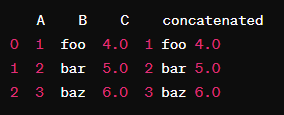

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Example documents
documents = [
    "This is the firstdocument.",
    "This document is the.econd_document.",
    "And this is the,thirdone.",
    "Is this the first document?",
]

# Create CountVectorizer object with modified token pattern
vectorizer = CountVectorizer(binary=True, token_pattern=r'\S+')

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert sparse matrix to array for visualization
X_array = X.toarray()

# Print feature names (vocabulary)
print("Vocabulary:", vectorizer.get_feature_names_out())

# Print feature matrix
print("Feature Matrix:")
print(X_array)


Vocabulary: ['and' 'document' 'document?' 'first' 'firstdocument.' 'is' 'the'
 'the,thirdone.' 'the.econd_document.' 'this']
Feature Matrix:
[[0 0 0 0 1 1 1 0 0 1]
 [0 1 0 0 0 1 0 0 1 1]
 [1 0 0 0 0 1 0 1 0 1]
 [0 0 1 1 0 1 1 0 0 1]]


In [7]:
columns = ['Suspicious API Call','Requested Permission', 'url', 'provider', 'Hardware Component','intent', 'activity', 'call', 'service_receiver', 'Used Permission']
for column in columns:
  vectorizer = CountVectorizer(binary=True, token_pattern=r'\S+')
  X = vectorizer.fit_transform(df[str(column)])
  print(column , " : ",X.shape[1])


Suspicious API Call  :  315
Requested Permission  :  3803
url  :  58443
provider  :  4463
Hardware Component  :  72
intent  :  6313
activity  :  181845
call  :  800
service_receiver  :  32569
Used Permission  :  70


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_data(df):
    # Concatenate all columns into a single string
    df['concatenated'] = df.apply(lambda row: ' '.join(row.astype(str)), axis=1)
    return df['concatenated']

def extract_features(df):
    # Preprocess the data
    data = preprocess_data(df)

    # Use CountVectorizer to tokenize and one-hot encode the data
    vectorizer = CountVectorizer(binary=True, token_pattern=r'\S+')
    X = vectorizer.fit_transform(data)

    return X, vectorizer.vocabulary_


In [11]:
# Assuming 'df' is your DataFrame
X, vocab = extract_features(df[['Suspicious API Call','Requested Permission', 'url', 'provider', 'Hardware Component','intent', 'activity', 'call', 'service_receiver', 'Used Permission']])

# X is now your feature matrix, and vocab contains the vocabulary
print(X.shape)  # Print shape of feature matrix

<ipython-input-8-f56d74b45acd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['concatenated'] = df.apply(lambda row: ' '.join(row.astype(str)), axis=1)


(129013, 286510)


In [18]:
for i,j in enumerate(vocab.items()):
  print(j)
  if i>5:
    break

('android/media/mediaplayer->start', 141045)
('android/app/activity->setcontentview', 140900)
('android/os/vibrator->cancel', 141093)
('android.permission.vibrate', 140720)
('android.hardware.touchscreen', 137091)
('android.intent.action.main', 138335)
('android.intent.category.launcher', 139852)


In [13]:
def swap_keys_and_values(original_dict):
    new_dict = {value: key for key, value in original_dict.items()}
    return new_dict

# Create new dictionary with swapped keys and values
vocab_n = swap_keys_and_values(vocab)

In [ ]:
# Retrieve the first row of X
first_row = X[0]

# Get the indices where the values are non-zero (indicating the presence of a term)
nonzero_indices = first_row.nonzero()[1]

# Get the corresponding terms from the vocabulary
terms = [term for term, index in vocab.items() if index in nonzero_indices]

print("First row of X with corresponding vocabulary terms:")
for term in terms:
    print(term)


First row of X with corresponding vocabulary terms:
android/media/mediaplayer->start
android/app/activity->setcontentview
android/os/vibrator->cancel
android.permission.vibrate
android.hardware.touchscreen
android.intent.action.main
android.intent.category.launcher
.flandroidapp
flandroidapp
getsystemservice
android.permission.internet
android.permission.wake_lock


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

labels= list(df['label'])

# Step 1: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, labels)

# Step 2: Access Feature Importances
feature_importances = rf_classifier.feature_importances_

# Step 3: Rank Features by Importance
# Get the indices that would sort the feature importances array in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the top N features and their importance scores
N = 20  # Number of top features to display
print("Top", N, "features:")
print("{:<60} {:<20}".format("Feature", "Importance Score"))
print('----------------------------------------------------------------')
for i in range(N):
    feature_index = sorted_indices[i]
    importance_score = feature_importances[feature_index]
    print("{:<60} {:<20}".format(vocab_n[feature_index], importance_score))

Top 20 features:
Feature                                                      Importance Score    
----------------------------------------------------------------
android/telephony/smsmanager->sendtextmessage                0.021188740825489903
android.permission.send_sms                                  0.021133616813288836
sendsms                                                      0.015160840515245699
android.permission.read_sms                                  0.011056074661270747
android.intent.action.sig_str                                0.010948066156365907
android.intent.action.boot_completed                         0.010701069166384856
android.permission.receive_sms                               0.010612659396461877
android.hardware.telephony                                   0.008099687985861439
android.permission.install_packages                          0.007889902992054032
android.intent.action.data_sms_received                      0.007704841515925151
android.intent.a

In [ ]:
# Assuming 'sorted_indices' contains the indices of the top 1000 important features

# Select the indices of the top 1000 important features
top_indices = sorted_indices[:10000]

# Redefine X based on the top 1000 important features
X_redefined = X[:, top_indices]

# Now X_redefined contains only the top 1000 important features
X_redefined.shape

(129013, 10000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

labels= list(df['label'])

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_redefined, labels, test_size=0.2, random_state=42)

# Instantiate a Random Forest classifier
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier2.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier2.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9948843157772352


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)


F1 Score: 0.9380863039399625


In [ ]:

from scipy import sparse
import torch

# Assuming your sparse matrix is named sparse_matrix
sparse.save_npz("sparse_matrix.npz", X_redefined)

# Convert labels to PyTorch tensor
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1)  # Reshape labels to match model output
torch.save(labels_tensor, 'labels.pt')


In [ ]:
# Convert a column to a NumPy array
labels = df['label'].values
labels.shape

(129013,)

In [ ]:
# Separate X based on labels
positive_indices = labels == 1
negative_indices = labels == 0

X_positive = X[positive_indices]
X_negative = X[negative_indices]

print("Positive samples shape:", X_positive.shape)
print("Negative samples shape:", X_negative.shape)

Positive samples shape: (5560, 286510)
Negative samples shape: (123453, 286510)


In [ ]:
# Sum each column of X_positive
positive_sums = X_positive.sum(axis=0)/X_positive.shape[0]
negative_sums = X_negative.sum(axis=0)/X_negative.shape[0]

In [ ]:
importance = abs(positive_sums - negative_sums)

# Find the indices of the top 1000 values
top_indices2 = np.argsort(importance)[0, -10000:]
top_indices2 = np.array(top_indices2)[0]

In [ ]:
len(set(top_indices2) - set(top_indices))

3820

In [ ]:
# Redefine X based on the top 1000 important features
X_redefined2 = X[:, top_indices2]

# Now X_redefined contains only the top 1000 important features
X_redefined2.shape

(129013, 10000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

labels= list(df['label'])

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_redefined2, labels, test_size=0.2, random_state=42)

# Instantiate a Random Forest classifier
rf_classifier3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier3.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier3.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9948843157772352


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.93796992481203


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from scipy import sparse


In [ ]:
# Split data into train, validation, and test sets with stratified sampling
X_train_val, X_test, labels_train_val, labels_test = train_test_split(X_redefined2, labels_tensor, test_size=0.2, stratify=labels, random_state=42)
X_train, X_val, labels_train, labels_val = train_test_split(X_train_val, labels_train_val, test_size=0.2, stratify=labels_train_val, random_state=42)

# Combine features and labels into datasets
train_dataset = TensorDataset(torch.tensor(X_train.toarray(), dtype=torch.float32), labels_train)
val_dataset = TensorDataset(torch.tensor(X_val.toarray(), dtype=torch.float32), labels_val)
test_dataset = TensorDataset(torch.tensor(X_test.toarray(), dtype=torch.float32), labels_test)


In [ ]:

# Define the DataLoader for training, validation, and test sets
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class MalwareClassifier(nn.Module):
    def __init__(self, dropout_prob):
        super(MalwareClassifier, self).__init__()
        # Define input size
        input_size = 10000
        # Define hidden layer sizes
        hidden_size = 200

        # Define the layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_prob)  # Dropout with specified probability
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_prob)  # Dropout with specified probability
        self.fc3 = nn.Linear(hidden_size, 1)  # Output layer with single neuron for binary classification
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation function for binary classification

    def forward(self, x):
        # Forward pass
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)  # Sigmoid activation for binary classification
        return out


In [ ]:
# Create an instance of the model with dropout probability of 0.6
model = MalwareClassifier(dropout_prob=0.6)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_X, batch_labels in train_loader:
        # Forward pass
        outputs = model(batch_X)

        # Compute loss
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print training loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}')

    # Evaluate on validation set
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_labels in val_loader:
            outputs = model(batch_X)
            val_loss += criterion(outputs, batch_labels).item()

            # Convert probabilities to predicted labels
            predicted = torch.round(outputs)

            # Count correct predictions
            correct += (predicted == batch_labels).sum().item()

            # Count total samples
            total += batch_labels.size(0)

    val_loss /= len(val_loader)
    accuracy = correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.4f}')

# Optionally, save the trained model
# torch.save(model.state_dict(), 'malware_classifier.pth')


Epoch [1/10], Training Loss: 0.0980
Epoch [1/10], Validation Loss: 0.0311, Validation Accuracy: 0.9909
Epoch [2/10], Training Loss: 0.0297
Epoch [2/10], Validation Loss: 0.0259, Validation Accuracy: 0.9927
Epoch [3/10], Training Loss: 0.0031
Epoch [3/10], Validation Loss: 0.0235, Validation Accuracy: 0.9933
Epoch [4/10], Training Loss: 0.0001
Epoch [4/10], Validation Loss: 0.0275, Validation Accuracy: 0.9924
Epoch [5/10], Training Loss: 0.0002
Epoch [5/10], Validation Loss: 0.0211, Validation Accuracy: 0.9940
Epoch [6/10], Training Loss: 0.0002
Epoch [6/10], Validation Loss: 0.0259, Validation Accuracy: 0.9933
Epoch [7/10], Training Loss: 0.0021
Epoch [7/10], Validation Loss: 0.0211, Validation Accuracy: 0.9950
Epoch [8/10], Training Loss: 0.0000
Epoch [8/10], Validation Loss: 0.0215, Validation Accuracy: 0.9949
Epoch [9/10], Training Loss: 0.0002
Epoch [9/10], Validation Loss: 0.0226, Validation Accuracy: 0.9949
Epoch [10/10], Training Loss: 0.0000
Epoch [10/10], Validation Loss: 0.02

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Evaluate the trained model on the test set
model.eval()  # Set the model to evaluation mode
predictions = []
true_labels = []

with torch.no_grad():
    for X_batch, labels_batch in test_loader:
        outputs = model(X_batch)
        predicted = torch.round(outputs)
        predictions.extend(predicted.tolist())
        true_labels.extend(labels_batch.tolist())

# Convert predictions and true labels to numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Test Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Test Accuracy: 0.9941
Precision: 0.9724
Recall: 0.8876
F1-score: 0.9281


In [ ]:
#here , we define prediction, as probability(not binary)
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.metrics import f1_score

# Evaluate the trained model on the test set
model.eval()  # Set the model to evaluation mode
predictions = []
true_labels = []

with torch.no_grad():
    for X_batch, labels_batch in test_loader:
        outputs = model(X_batch)
        predictions.extend(outputs.tolist())
        true_labels.extend(labels_batch.tolist())

# Convert predictions and true labels to numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)


# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(true_labels, predictions)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1-score
best_f1_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print(f'Best F1-score: {best_f1_score:.4f} at threshold: {best_f1_threshold:.4f}')


Best F1-score: 0.9341 at threshold: 0.3464


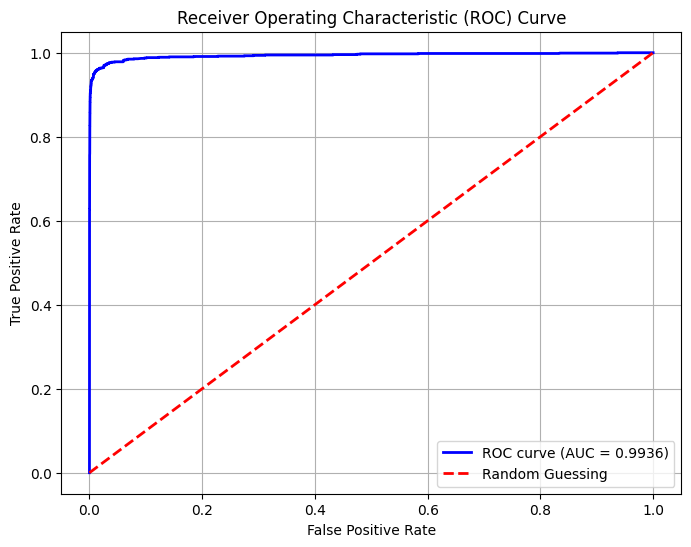

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()